In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
dataset_path = "titanic_modified_dataset.csv"
df = pd.read_csv(
    dataset_path,
    index_col = "PassengerId"
)

In [4]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0


In [5]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y= dataset_arr[:, :-1], dataset_arr[:, -1]

In [7]:
intercept = np.ones((X.shape[0], 1))
X_b = np.concatenate((intercept, X), axis=1)

In [8]:
X_b

array([[ 1.    ,  1.    ,  3.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  1.    ,  3.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  1.    ,  3.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  1.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  1.    ,  3.    , ...,  7.75  ,  2.    ,  0.    ]])

In [9]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True 

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y, 
    test_size=val_size, 
    random_state=random_state, 
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, 
    test_size=test_size, 
    random_state=random_state, 
    shuffle=is_shuffle
)

In [10]:
normalizer = StandardScaler()
X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [17]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, theta):
    dot_product = np.dot(X, theta)
    y_hat = sigmoid(dot_product)
    return y_hat

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1 - 1e-7)
    return (-y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)).mean()

def compute_gradient(X, y, y_hat):
    return np.dot(X.T, (y_hat - y)) / y.size

def update_theta(theta, gradient, learning_rate):
    return theta - learning_rate * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta).round()
    acc = (y_hat == y).mean()
    
    return acc 

In [31]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(
    size=X_train.shape[1]
)

In [32]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]
        
        y_hat = predict(X_i, theta)
        
        loss = compute_loss(y_hat, y_i)
        
        gradient = compute_gradient(X_i, y_i, y_hat)
        
        theta = update_theta(theta, gradient, lr)
        
        train_batch_losses.append(loss)
        
        acc = compute_accuracy(X_i, y_i, theta)
        train_batch_accs.append(acc)
        
        y_hat_val = predict(X_val, theta)
        val_loss = compute_loss(y_hat_val, y_val)
        val_batch_losses.append(val_loss)
        
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
        
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    val_losses.append(val_batch_loss)
    
    print(f"\nEPOCH {epoch + 1}:\tTrainning loss: {train_batch_loss:.3f}\tValidation_loss: {val_batch_loss:.3f}")
    


EPOCH 1:	Trainning loss: 0.731	Validation_loss: 0.675

EPOCH 2:	Trainning loss: 0.692	Validation_loss: 0.647

EPOCH 3:	Trainning loss: 0.659	Validation_loss: 0.624

EPOCH 4:	Trainning loss: 0.630	Validation_loss: 0.606

EPOCH 5:	Trainning loss: 0.606	Validation_loss: 0.590

EPOCH 6:	Trainning loss: 0.585	Validation_loss: 0.577

EPOCH 7:	Trainning loss: 0.567	Validation_loss: 0.566

EPOCH 8:	Trainning loss: 0.551	Validation_loss: 0.557

EPOCH 9:	Trainning loss: 0.537	Validation_loss: 0.550

EPOCH 10:	Trainning loss: 0.526	Validation_loss: 0.544

EPOCH 11:	Trainning loss: 0.515	Validation_loss: 0.539

EPOCH 12:	Trainning loss: 0.506	Validation_loss: 0.535

EPOCH 13:	Trainning loss: 0.499	Validation_loss: 0.531

EPOCH 14:	Trainning loss: 0.492	Validation_loss: 0.528

EPOCH 15:	Trainning loss: 0.486	Validation_loss: 0.526

EPOCH 16:	Trainning loss: 0.480	Validation_loss: 0.524

EPOCH 17:	Trainning loss: 0.475	Validation_loss: 0.522

EPOCH 18:	Trainning loss: 0.471	Validation_loss: 0.521



[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

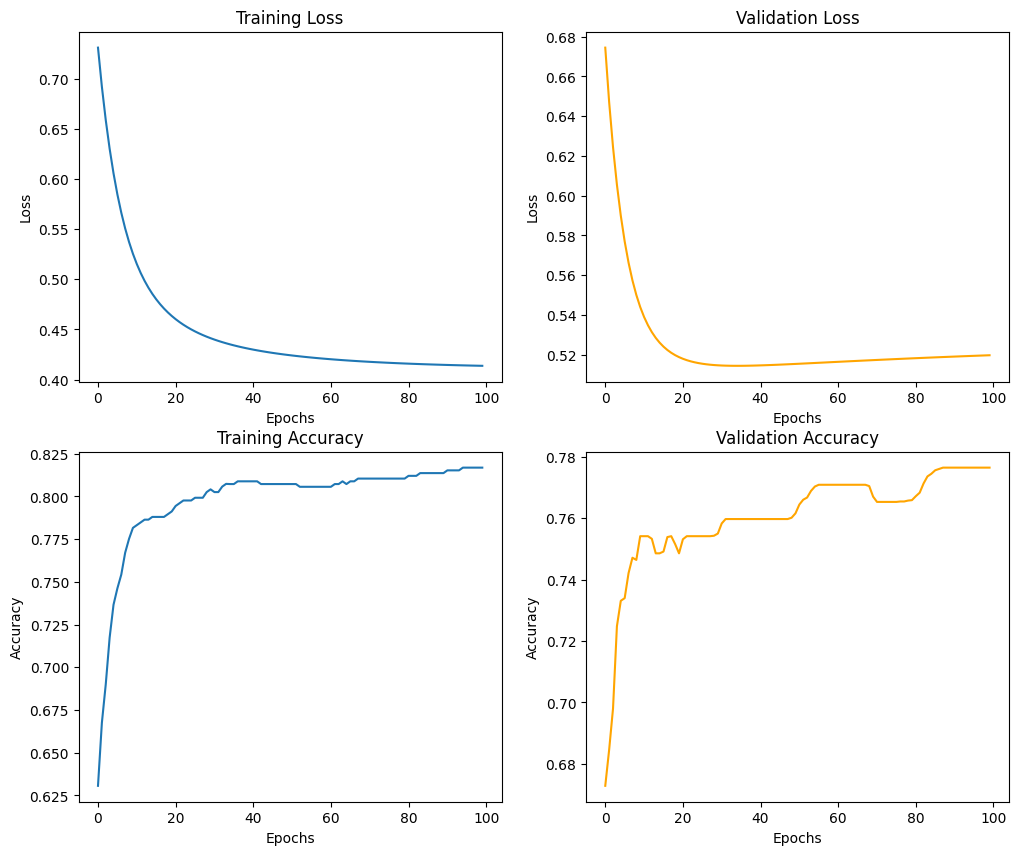

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set_title("Training Loss")
ax[0, 0].set(xlabel="Epochs", ylabel="Loss")

ax[0, 1].plot(val_losses, "orange")
ax[0, 1].set_title("Validation Loss")
ax[0, 1].set(xlabel="Epochs", ylabel="Loss")

ax[1, 0].plot(train_accs)
ax[1, 0].set_title("Training Accuracy")
ax[1, 0].set(xlabel="Epochs", ylabel="Accuracy")

ax[1, 1].plot(val_accs, "orange")
ax[1, 1].set_title("Validation Accuracy")
ax[1, 1].set(xlabel="Epochs", ylabel="Accuracy")

In [34]:
val_set_acc = compute_accuracy(X_val, y_val, theta)
test_set_acc = compute_accuracy(X_test, y_test, theta)

print(f"Evaluation on validation and test set:")
print(f"Validation set accuracy: {val_set_acc:.3f}")
print(f"Test set accuracy: {test_set_acc:.3f}")

Evaluation on validation and test set:
Validation set accuracy: 0.777
Test set accuracy: 0.798
